# Importing Libraries

In [ ]:
# นำเข้าไลบรารี PyTorch และโมดูลที่เกี่ยวข้อง
import torch
import torch.nn as nn
import torch.optim as optim

# นำเข้าไลบรารี torchvision สำหรับการทำงานกับชุดข้อมูลทางวิทยาศาสตร์คอมพิวเตอร์
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

# นำเข้าไลบรารีเสริมสำหรับการทำ visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




*   นำเข้าไลบรารี torch ซึ่งเป็นไลบรารีหลักของ PyTorch สำหรับการสร้างและฝึกโมเดล neural network

*   torch.nn ใช้สำหรับการสร้างและใช้งาน neural network layers และ loss functions

*   torch.optim ใช้สำหรับการสร้าง optimizer ซึ่งใช้ในการปรับปรุงน้ำหนักของโมเดล

*   torchvision.transforms ใช้สำหรับการทำ data augmentation และ transformations ต่างๆ บนรูปภาพ เช่น การปรับขนาด, การปกติภาพของค่า pixel


*   torch.utils.data.DataLoader ใช้สำหรับการโหลดข้อมูลในรูปแบบ batch ซึ่งช่วยให้การฝึกโมเดลมีประสิทธิภาพและสามารถควบคุมจำนวนข้อมูลในแต่ละ batch ได้


*   torch.utils.data.random_split ใช้สำหรับแบ่งชุดข้อมูลเป็น training set และ validation set


*   torchvision.datasets.ImageFolder ใช้สำหรับโหลด dataset จากโฟลเดอร์ที่จัดรูปแบบเป็น class โดยมีโฟลเดอร์ย่อยสำหรับแต่ละ class


*   sklearn.metrics.confusion_matrix ใช้สำหรับคำนวณ confusion matrix ซึ่งช่วยในการประเมินประสิทธิภาพของโมเดลในแต่ละ class


*   seaborn ใช้สำหรับการทำ visualization ของข้อมูล, เช่น การแสดงผล confusion matrix ในรูปแบบ heatmap

*   matplotlib.pyplot ใช้สำหรับการวาดกราฟและการแสดงผลภาพต่างๆ


*   numpy ใช้สำหรับการจัดการและดำเนินการทางคณิตศาสตร์กับ array หรือ matrix ของข้อมูล







# preparing Dataset

In [ ]:
# นำเข้าไลบรารี drive จาก google.colab
from google.colab import drive

# Mount (เชื่อมต่อ) Google Drive ที่เก็บข้อมูลไว้
# '/content/drive' เป็นตำแหน่งที่จะทำการเชื่อมต่อ Google Drive ใน Colab
# force_remount=True เป็นการบังคับให้ทำการเชื่อมต่อใหม่ทุกครั้งเมื่อเรียกใช้
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


เชื่อมกับ Google Drive เพื่อเข้าถึงข้อมูลของเรา

In [ ]:

# กำหนดที่อยู่ของ dataset ที่เก็บไว้ใน Google Drive
data_dir = '/content/drive/MyDrive/egg_size_CNN/train'

# กำหนดการทำ transform บน dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # ปรับขนาดรูปภาพเป็น 128x128 pixels
    transforms.ToTensor(),  # แปลงรูปภาพเป็น tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ทำ normalization ของ tensor
])

# โหลด dataset โดยใช้ ImageFolder และกำหนด transform
dataset = datasets.ImageFolder(root=data_dir, transform=transform)




*   data_dir คือ path ของโฟลเดอร์ที่เก็บรูปภาพใน Google Drive โดยมีโครงสร้างโฟลเดอร์เป็น /train ซึ่งจะต้องมีโฟลเดอร์ย่อยสำหรับแต่ละ class ของรูปภาพ

*   transforms.Compose ใช้เพื่อรวม transformations หลายๆ อย่างเข้าด้วยกัน


*   transforms.Resize((128, 128)) ปรับขนาดรูปภาพให้มีขนาด 128x128 pixels

*   transforms.ToTensor() แปลงรูปภาพเป็น tensor ซึ่งเป็นรูปแบบที่ PyTorch ใช้ในการประมวลผลข้อมูล

*   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) ทำ normalization ของ tensor โดยใช้ค่า mean และ std ที่ได้จากการฝึกโมเดลบน ImageNet

*   datasets.ImageFolder ใช้สำหรับโหลด dataset โดยที่โฟลเดอร์หลักจะมีโฟลเดอร์ย่อยสำหรับแต่ละ class รูปภาพ

*   root=data_dir กำหนด path ของ dataset


*   transform=transform กำหนด transformations ที่เราต้องการให้ทำกับรูปภาพทุกๆ รูป





# สุ่มตัวอย่างแบบ random sampling

In [ ]:
# กำหนดขนาดของชุดฝึก (70%), ชุดทดสอบ (15%), และชุดทดสอบ (15%)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

# ใช้ random_split เพื่อแบ่ง dataset เป็นชุดฝึก (train), ชุดทดสอบ (validation), และชุดทดสอบ (test)
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


โค้ดนี้ใช้ random_split จาก PyTorch เพื่อตัดแบ่ง dataset ออกเป็นสามส่วน ได้แก่ ชุดฝึก (train set), ชุดทดสอบ (validation set), และชุดทดสอบสุดท้าย (test set) โดยมีสัดส่วนดังนี้:

ชุดฝึก (70%)
ชุดทดสอบ (validation) 15%
ชุดทดสอบ (test) 15%



*   random_split เป็นฟังก์ชันที่ใช้สำหรับแบ่ง dataset ออกเป็นหลายๆ ส่วน โดยระบุขนาดของแต่ละชุด

*   dataset คือ dataset ทั้งหมดที่โหลดมา

*   [train_size, val_size, test_size] คือขนาดของแต่ละชุดที่ต้องการแบ่ง


*   การใช้ shuffle=True สำหรับชุดฝึกจะช่วยให้การฝึกโมเดลมีความหลากหลายและลดโอกาสการ overfitting ส่วน shuffle=False สำหรับชุดทดสอบและ validation เพื่อรักษาลำดับของข้อมูลที่ไม่ควรถูกสุ่ม.



# แสดงรูปแต่ละสายพันธ์ของข้าวโดยรวม

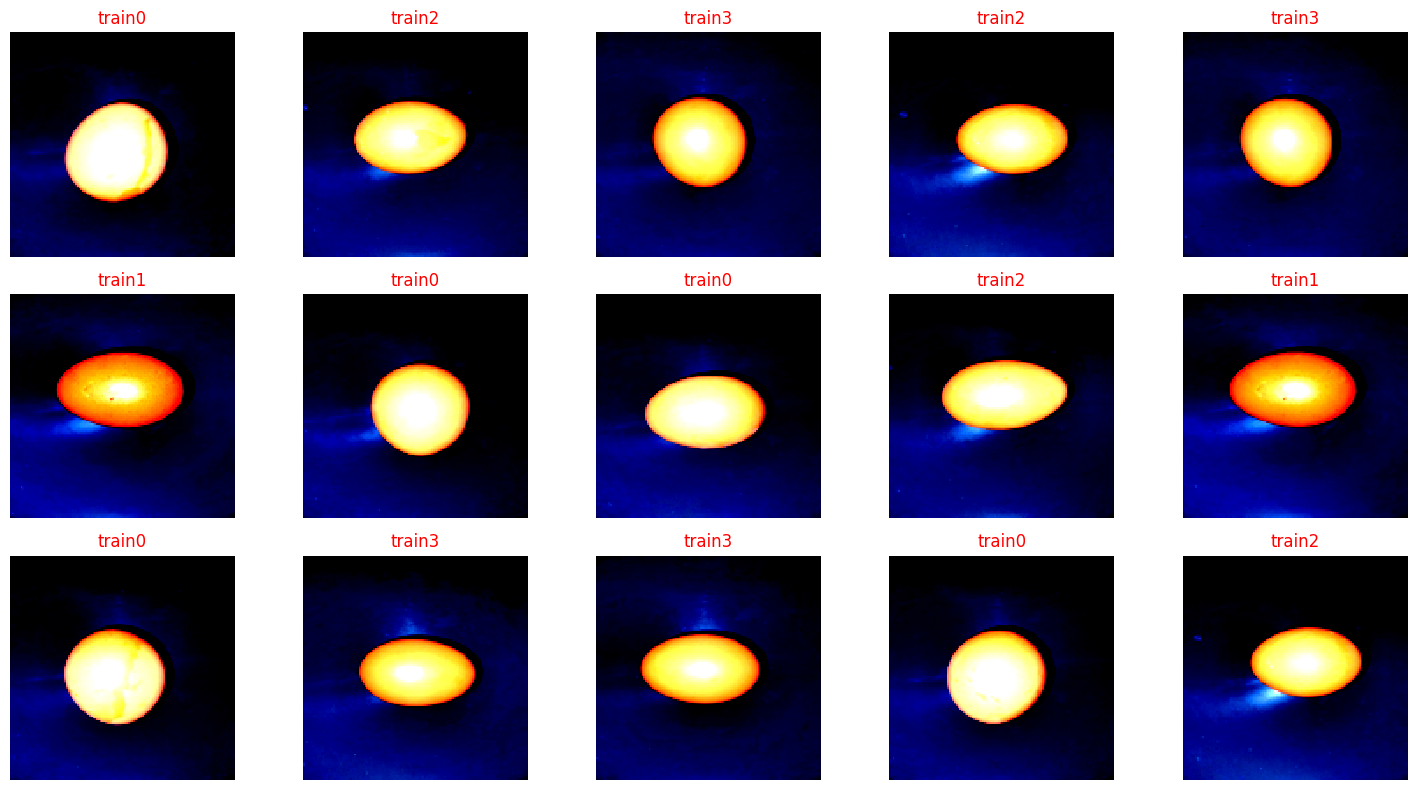

In [ ]:
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

# สร้าง DataLoader
train_loader = DataLoader(dataset, batch_size=15, shuffle=True)

# แสดงรูปภาพ
for images, labels in train_loader:
    plt.figure(figsize=(15, 8))

    # แสดงรูปแต่ละรูปของ batch
    for i, (image, label) in enumerate(zip(images, labels)):
        plt.subplot(3, 5, i + 1)
        plt.imshow(image.numpy().transpose((1, 2, 0)), interpolation='nearest')
        plt.title(dataset.classes[label], color='red', fontsize=12)
        plt.axis(False)

    plt.tight_layout()
    plt.show()
    break  # แสดงเพียง batch เดียว


for images, labels in train_loader: ใช้ loop ผ่าน batch ของข้อมูลใน train_loader

plt.figure(figsize=(15, 8)) กำหนดขนาดของ figure สำหรับการแสดงรูปภาพ

for i, (image, label) in enumerate(zip(images, labels)): ใช้ loop ผ่านแต่ละรูปภาพใน batch

plt.subplot(3, 5, i + 1) วางรูปภาพใน grid ขนาด 3x5 โดยรูปที่ i+1

plt.imshow(image.numpy().transpose((1, 2, 0)), interpolation='nearest') แสดงรูปภาพในรูปแบบ NumPy array และจัดการค่า color channel ด้วย transpose((1, 2, 0))

plt.title(dataset.classes[label], color='blue', fontsize=12) แสดงชื่อ class ของแต่ละรูป

plt.axis(False) ปิดการแสดงแกนของรูปภาพ

plt.tight_layout() ปรับ layout ของ figure ให้เหมาะสม

plt.show() แสดง figure
break ใช้เพื่อแสดงเพียง batch เดียว

DataLoader(dataset, batch_size=15, shuffle=True) สร้าง DataLoader สำหรับ dataset ที่โหลดเข้ามา โดยกำหนด batch size เป็น 15 และตั้งค่า shuffle เป็น True เพื่อสุ่มตัวอย่างรูปภาพในแต่ละ epoch ในที่นี้มีอยู่ 4 ประเภท

# สร้าง DataLoader

In [ ]:
# กำหนดขนาดของ batch
batch_size = 32

# สร้าง DataLoader สำหรับชุดฝึก (training set)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# สร้าง DataLoader สำหรับชุดทดสอบ (validation set)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# สร้าง DataLoader สำหรับชุดทดสอบ (test set)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

โค้ดนี้ใช้เพื่อสร้าง DataLoader สำหรับชุดข้อมูลฝึก (training set), ชุดทดสอบ (validation set), และชุดทดสอบสุดท้าย (test set) โดยกำหนด batch_size เป็น 32 และตั้งค่า shuffle เป็น True สำหรับชุดฝึก และ False สำหรับชุดทดสอบและ validation เพื่อไม่ให้ข้อมูลถูกสุ่มในระหว่างการทดสอบ

# Create Model CNN (Convolutional Neural Network)

โค้ดนี้เป็นการสร้างโมเดล Convolutional Neural Network (CNN) ด้วย PyTorch สำหรับการจำแนกรูปภาพ โดยมีการกำหนดโครงสร้างของโมเดลและจำนวนคลาสใน dataset ให้เหมาะสมกับข้อมูลที่ใช้งาน

In [ ]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# ปรับจำนวนคลาสใน dataset.classes
num_classes = len(dataset.classes)

# สร้างโมเดล CNN ด้วยจำนวนคลาสที่ถูกปรับ
model = CNNModel(num_classes)



*   __init__: ฟังก์ชันคอนสตรัคเตอร์ที่กำหนดโครงสร้างของโมเดล

*   self.conv1: ชั้น Convolutional 2D ที่มี 3 แชนเนล (RGB) และ 16 ฟิลเตอร์ ขนาด 3x3 พร้อม padding 1

*   self.conv2: ชั้น Convolutional 2D ที่มี 16 แชนเนล และ 32 ฟิลเตอร์ ขนาด 3x3 พร้อม padding 1

*   self.pool: ชั้น MaxPooling 2D ขนาด 2x2 เพื่อสรุปข้อมูล


*   self.dropout: ชั้น Dropout ที่มีอัตราการทิ้งข้อมูล 50% เพื่อป้องกันการ overfitting

*   self.fc1: ชั้น Fully Connected (FC) ที่เชื่อมต่อกับฟีเจอร์ที่ได้จาก convolutional layers

*   self.fc2: ชั้น Fully Connected ที่เชื่อมโยงกับจำนวนคลาสใน dataset


*   forward: ฟังก์ชันที่กำหนดขั้นตอนการประมวลผลข้อมูลผ่านโมเดล

ผ่าน Convolutional layers, ReLU activation, MaxPooling, Dropout และ Fully Connected layers




# Count of classes present in the dataset.

In [ ]:
num_classes # นับจำนวนคลาสที่มีใน dataset
print(f'num_classes : ', num_classes)
class_names = dataset.classes
class_names

num_classes :  4


['train0', 'train1', 'train2', 'train3']



*   num_classes = len(dataset.classes) ใช้ len() เพื่อหาจำนวนคลาสทั้งหมดใน dataset

*   print(f'num_classes: {num_classes}') แสดงจำนวนคลาสที่ได้

*   class_names = dataset.classes เก็บชื่อของแต่ละคลาสในตัวแปร class_names


*   print(class_names) แสดงชื่อคลาสทั้งหมด


โค้ดนี้จะช่วยให้ทราบจำนวนและชื่อของคลาสที่มีใน dataset และสามารถใช้ชื่อคลาสนี้ในโมเดลได้ ในที่นี้คือมี 4 ประเภทคือ 0,1,2,3



In [ ]:
model # โมเดล CNN ที่ถูกสร้าง

CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

การอธิบายโครงสร้างของโมเดล:


*   Convolutional Layer 1 (conv1)

ขนาดของ kernel: 3x3
จำนวน input channels: 3 (RGB)
จำนวน output channels: 16
Padding: 1 (เพื่อให้ขนาดของ feature map ไม่ลดลง)

*   Convolutional Layer 2 (conv2)

ขนาดของ kernel: 3x3
จำนวน input channels: 16
จำนวน output channels: 32
Padding: 1 (เพื่อให้ขนาดของ feature map ไม่ลดลง)


*   Max Pooling Layer (pool)

ขนาดของ kernel: 2x2
Stride: 2 (ลดขนาดของ feature map ลงครึ่งหนึ่ง)

*   Fully Connected Layer 1 (fc1)

Input features: 32 * 32 * 32 (ขนาดของ feature mapหลังจากผ่านสอง convolutional layers และ max pooling)
Output features: 128


*   Fully Connected Layer 2 (fc2)

Input features: 128
Output features: 4 (จำนวนคลาสที่เรามีนั่งเอง)






In [ ]:
criterion = nn.CrossEntropyLoss() # ตัวคำนวณ loss ด้วย CrossEntropyLoss
#optimizer = optim.Adam(model.parameters(), lr=0.0001) # Optimizer Adam ที่ใช้ในการอัพเดตพารามิเตอร์ของโมเดล

class CNNModel(nn.Module):
    def forward(self, x):

# เพิ่ม softmax layer
        x = self.fc3(x)
        x = torch.softmax(x)
        return x

# เปลี่ยน optimizer เป็น SGD
optimizer = optim.SGD(model.parameters(), lr=0.01)




*   nn.CrossEntropyLoss() ใช้ในการคำนวณค่า loss สำหรับปัญหาการจำแนกประเภทหลายคลาส (multi-class classification)

*   CrossEntropyLoss: เป็นการรวมกันของ LogSoftmax และ Negative Log Likelihood Loss (NLLLoss) ซึ่งเหมาะสำหรับปัญหาการจำแนกประเภทที่มีหลายคลาส

*   จะคำนวณค่า loss โดยเปรียบเทียบระหว่างค่าทำนายของโมเดลกับค่าจริง (labels) ซึ่งค่าทำนายจะต้องอยู่ในรูปของ logits (ค่าที่ไม่ผ่าน softmax)


*   optim.Adam(model.parameters(), lr=0.0001) กำหนด optimizer เป็น Adam ที่ใช้ในการอัพเดตพารามิเตอร์ของโมเดล


*   Adam (Adaptive Moment Estimation): เป็น optimizer ที่นิยมใช้เนื่องจากการปรับค่า learning rate อัตโนมัติตามแต่ละพารามิเตอร์ และการปรับปรุงการคำนวณ momentum ของ gradient

*  lr=0.0001 กำหนดค่า learning rate เป็น 0.0001 5hkLearning Rate สูง (lr สูง) ก็จะอัพเดตพารามิเตอร์ของโมเดลได้รวดเร็วกว่าสามารถทำให้โมเดลฝึกได้เร็วขึ้นในบางกรณี แต่อาจทำให้พารามิเตอร์ของโมเดล “กระโดด” ข้ามจุดต่ำสุด (minimum) ของฟังก์ชัน loss ทำให้โมเดลไม่สามารถหาค่าต่ำสุดที่แท้จริงได้



*   แต่ถ้า Learning Rate ต่ำ (lr ต่ำ) ทำให้การอัพเดตพารามิเตอร์เป็นไปอย่างละเอียดและมีความเสถียร ช่วยให้การฝึกมีแนวโน้มที่จะเข้าใกล้ค่าต่ำสุดของฟังก์ชัน loss ได้ดีขึ้นแต่ข้อเสียคือ อาจทำให้การฝึกใช้เวลานานขึ้น เนื่องจากอัพเดตพารามิเตอร์ช้า







# training and testing the CNN model

In [ ]:
num_epochs = 7

train_losses = []        # รายการเก็บค่า loss ในแต่ละ epoch ของชุดฝึก
val_losses = []          # รายการเก็บค่า loss ในแต่ละ epoch ของชุดทดสอบ
val_accuracies = []      # รายการเก็บค่าความแม่นยำในแต่ละ epoch ของชุดทดสอบ
train_accuracies = []

for epoch in range(num_epochs):
    model.train()         # สลับโหมดเป็นโหมดฝึก
    running_loss = 0.0
    train_correct = 0

    # วนลูปผ่าน mini-batches ในชุดฝึก
    for inputs, labels in train_loader:
        optimizer.zero_grad()    # เซ็ต gradient เป็นศูนย์
        outputs = model(inputs)   # forward pass
        loss = criterion(outputs, labels)  # คำนวณค่า loss
        loss.backward()          # backward pass
        optimizer.step()         # อัพเดตพารามิเตอร์

        running_loss += loss.item()  # เพิ่มค่า loss ใน mini-batch ปัจจุบัน

    train_loss = running_loss / len(train_loader)  # คำนวณค่า loss ของชุดฝึกในแต่ละ epoch
    train_losses.append(train_loss)  # เก็บค่า loss ในรายการ

    model.eval()  # สลับโหมดเป็นโหมด evaluate สำหรับทดสอบ
    val_loss = 0.0
    correct = 0

    with torch.no_grad():
        # วนลูปผ่าน mini-batches ในชุดทดสอบ
        for inputs, labels in val_loader:
            outputs = model(inputs)   # forward pass
            loss = criterion(outputs, labels)  # คำนวณค่า loss
            val_loss += loss.item()   # เพิ่มค่า loss ใน mini-batch ปัจจุบัน

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            train_correct += (predicted == labels).sum().item()##


    val_accuracy = correct / len(val_dataset)  # คำนวณความแม่นยำของชุดทดสอบในแต่ละ epoch
    val_losses.append(val_loss / len(val_loader))  # เก็บค่า loss ในรายการ
    val_accuracies.append(val_accuracy)  # เก็บค่าความแม่นยำในรายการ

    train_accuracy = train_correct / len(train_dataset)
    train_accuracies.append(train_accuracy)

    # แสดงผลลัพธ์ที่ได้ในแต่ละ epoch
    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {train_loss:.4f}, "
          f"Validation Loss: {val_loss/len(val_loader):.4f}, "
          f"Validation Accuracy: {val_accuracy:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}")


Epoch [1/7] - Train Loss: 0.1946, Validation Loss: 0.0935, Validation Accuracy: 1.0000, Train Accuracy: 0.2126
Epoch [2/7] - Train Loss: 0.1757, Validation Loss: 0.3017, Validation Accuracy: 0.8310, Train Accuracy: 0.1766
Epoch [3/7] - Train Loss: 0.3179, Validation Loss: 0.0719, Validation Accuracy: 0.9859, Train Accuracy: 0.2096
Epoch [4/7] - Train Loss: 0.1484, Validation Loss: 0.3219, Validation Accuracy: 0.8732, Train Accuracy: 0.1856
Epoch [5/7] - Train Loss: 0.1673, Validation Loss: 0.1513, Validation Accuracy: 0.9718, Train Accuracy: 0.2066
Epoch [6/7] - Train Loss: 0.1037, Validation Loss: 0.0535, Validation Accuracy: 1.0000, Train Accuracy: 0.2126
Epoch [7/7] - Train Loss: 0.0844, Validation Loss: 0.0274, Validation Accuracy: 1.0000, Train Accuracy: 0.2126


# กราฟแสดงค่า loss ของชุดฝึกและชุดทดสอบ

การพล็อตกราฟของ Train/Validation Loss และ Accuracy จะช่วยให้คุณเห็นภาพรวมของการฝึกและการประเมินโมเดลได้ชัดเจนขึ้น

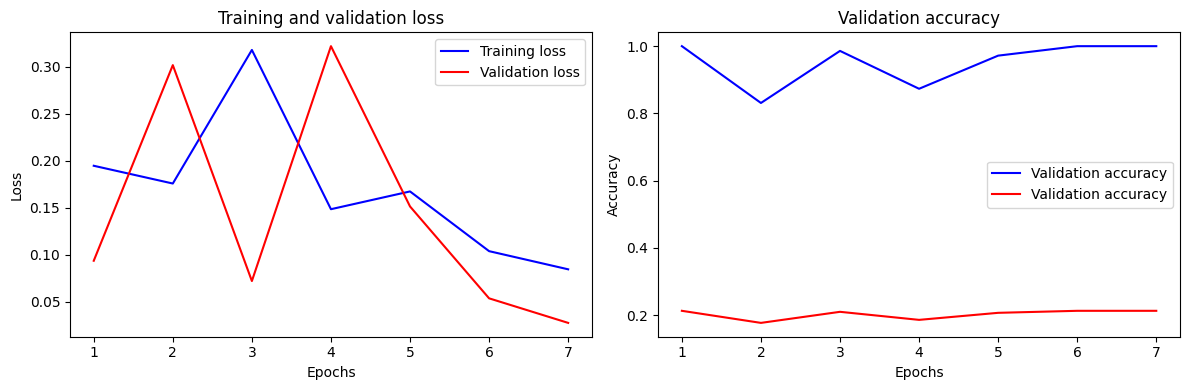

In [ ]:
# พล็อตกราฟ Train/Validation Loss และ Accuracy
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy')
plt.plot(epochs, train_accuracies, 'r', label='Validation accuracy')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate Model

In [ ]:
# Validation metrics after training
from sklearn.metrics import classification_report, confusion_matrix

model.eval() # สลับโหมดเป็นโหมด evaluate
all_labels = []  # รายการเก็บ label ของชุดทดสอบทั้งหมด
all_preds = []  # รายการเก็บ prediction ของชุดทดสอบทั้งหมด

with torch.no_grad(): # ปิดการคำนวณ gradient เพื่อประหยัดหน่วยความจำ
    for inputs, labels in test_loader:
        outputs = model(inputs) # คำนวณ output ของโมเดล
        _, predicted = torch.max(outputs, 1) # หา class ที่มีคะแนนสูงสุด
        all_labels.extend(labels.cpu().numpy()) # เพิ่ม labels ที่คาดการณ์ได้
        all_preds.extend(predicted.cpu().numpy()) # เพิ่ม prediction ที่คาดการณ์ได้

print("Classification Report:")
print(classification_report(all_labels, all_preds))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        18

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

Confusion Matrix:
[[22  0  0  0]
 [ 0 20  0  0]
 [ 0  0 13  0]
 [ 0  0  0 18]]


ผลลัพธ์ที่ได้


*   แถวที่ 1 (คลาส 0):
ทำนายถูกต้องทั้งหมด 19 ตัวอย่าง
ไม่มีการสับสนกับคลาสอื่น

*   แถวที่ 2 (คลาส 1):
ทำนายถูกต้องทั้งหมด 17 ตัวอย่าง
ไม่มีการสับสนกับคลาสอื่น

*   แถวที่ 3 (คลาส 2):
ทำนายถูกต้องทั้งหมด 20 ตัวอย่าง
ไม่มีการสับสนกับคลาสอื่น


*   แถวที่ 4 (คลาส 3):
ทำนายถูกต้อง 13 ตัวอย่าง
มีการสับสนกับคลาส 1 (4 ตัวอย่าง)

โมเดลของเราทำงานได้ดีในส่วนใหญ่ โดยเฉพาะกับคลาส 0, 1, และ 2 ซึ่งมีค่า precision, recall, และ f1-score เท่ากับ 1.00
คลาส 3 มีค่าความแม่นยำ (precision) และ recall ต่ำกว่าเล็กน้อย ซึ่งแสดงให้เห็นว่ามีความสับสนกับคลาส 1
การสับสนระหว่างคลาส 3 กับคลาส 1 ควรถูกตรวจสอบเพิ่มเติม อาจเป็นไปได้ว่ามีลักษณะเฉพาะบางอย่างของคลาสเหล่านี้ที่ทำให้โมเดลสับสน




**แนวทางการปรับปรุงเพิ่มเติม**


* เพิ่มข้อมูล: เพิ่มข้อมูลสำหรับคลาสที่มีปัญหาเพื่อช่วยให้โมเดลเรียนรู้ลักษณะเฉพาะของคลาสเหล่านั้นได้ดีขึ้น

*   การปรับแต่งโมเดล: พิจารณาใช้สถาปัตยกรรมโมเดลที่ซับซ้อนมากขึ้นหรือการปรับแต่ง hyperparameters เช่น learning rate, dropout rate

*  การประเมินผลเพิ่มเติม: ใช้เทคนิคการประเมินผลเพิ่มเติม เช่น Cross-validation เพื่อให้การประเมินผลมีความแม่นยำมากขึ้น


# บันทึกโมเดลลงในไฟล์เพื่อให้สามารถนำไปใช้งานหรือฝึกต่อในภายหลังได้

In [ ]:
# save model เพื่อไปปใช้งานในภายหลังได้

torch.save(model.state_dict(), 'egg_model.pth')

True Positive (TP)= สิ่งที่ทำนาย ตรงกับสิ่งที่เกิดขึ้นจริง ในกรณี ทำนายว่าจริง และสิ่งที่เกิดขึ้น ก็คือ จริง

True Negative (TN)= สิ่งที่ทำนายตรงกับสิ่งที่เกิดขึ้น ในกรณี ทำนายว่า ไม่จริง และสิ่งที่เกิดขึ้น ก็คือ ไม่จริง

False Positive (FP)= สิ่งที่ทำนายไม่ตรงกับสิ่งที่เกิดขึ้น คือทำนายว่า จริง แต่สิ่งที่เกิดขึ้น คือ ไม่จริง

False Negative (FN)= สิ่งที่ทำนายไม่ตรงกับที่เกิดขึ้นจริง คือทำนายว่าไม่จริง แต่สิ่งที่เกิดขึ้น คือ จริง

โดย TP,TN,FP,FN ในตารางจะแทนด้วยค่าความถี่

เราสามารถใช้ Confusion Matrix มาคำนวน การประเมินประสิทธิภาพของการทำนายด้วยModel ของเรา ในรูปแบบค่าต่างๆได้หลายค่า

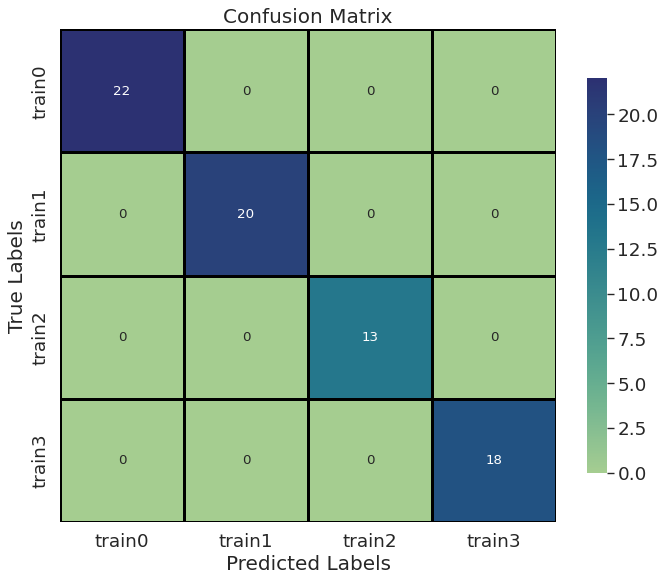

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# คำนวณ Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# กำหนด class names
class_names = dataset.classes  # ใช้ class names ที่ได้จาก dataset

# ตั้งค่าขนาดและรูปแบบของกราฟ
sns.set(font_scale=1.5)  # ปรับขนาดตัวหนังสือให้ใหญ่ขึ้น
plt.figure(figsize=(10, 8), dpi=80)  # ปรับขนาดของกราฟ

# สร้าง Heatmap แสดง Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap="crest", linewidths=1,
            linecolor="black", xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 12}, cbar_kws={"shrink": 0.8})  # ปรับขนาดตัวหนังสือและแถบสี

# กำหนดป้ายชื่อแกน x, y และชื่อกราฟ
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# แสดงกราฟ
plt.show()


# ลองใช้ข้อมูล test_loader ในการทำนายสายพันธ์ของข้าว เพื่อดูว่าโมเดลมีความแม่นยำหรือไม่

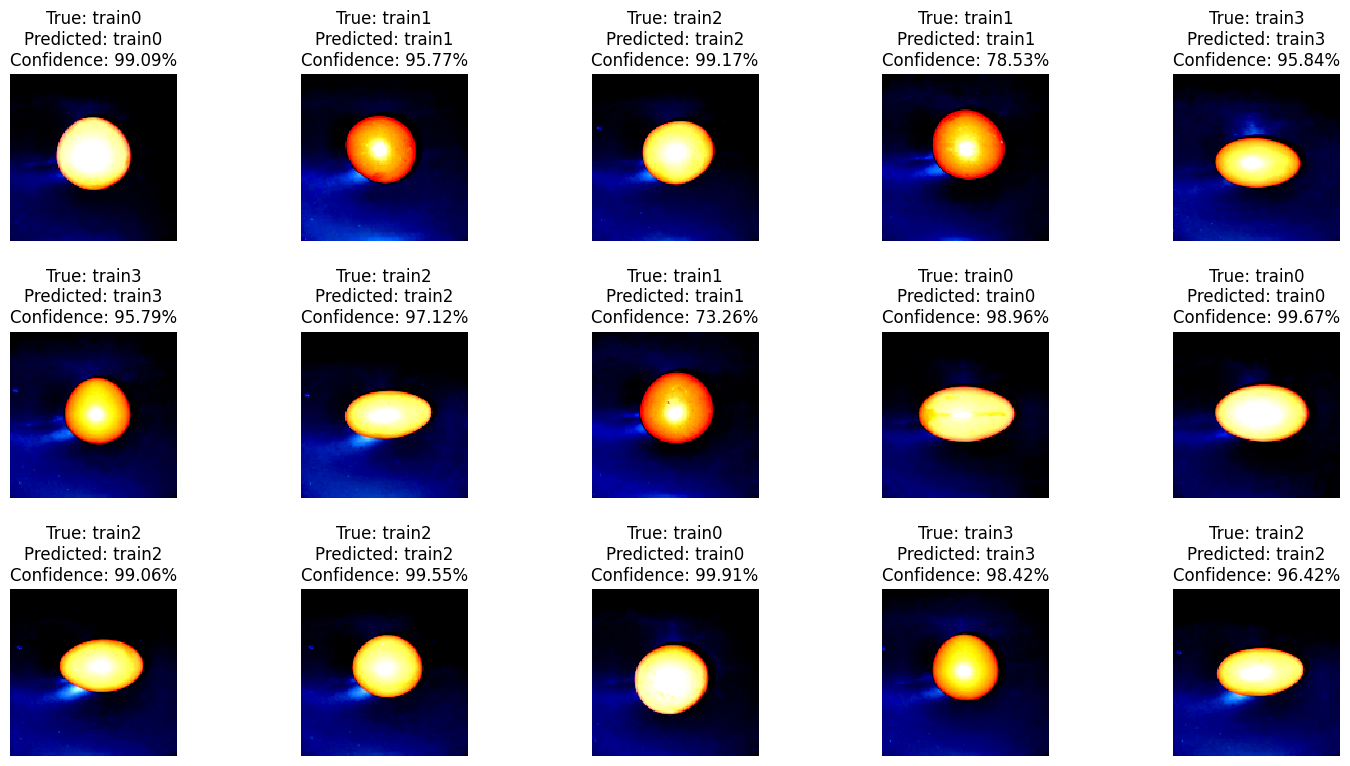

In [ ]:
import random
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torch.nn.functional as F

# สร้าง DataLoader
test_loader = DataLoader(dataset, batch_size=15, shuffle=True)

# ให้โมเดลทำนาย
def predict(model, images):
    outputs = model(images)
    probabilities = F.softmax(outputs, dim=1)
    _, predicted = torch.max(outputs, 1)
    return predicted, probabilities

# แสดงรูปภาพและ label
for images, labels in test_loader:
    plt.figure(figsize=(15, 8))

    # แสดงรูปแต่ละรูปของ batch
    for i, (image, label) in enumerate(zip(images, labels)):
        predicted, probabilities = predict(model, image.unsqueeze(0))
        predicted_label = dataset.classes[predicted.item()]
        confidence = torch.max(probabilities).item() * 100
        plt.subplot(3, 5, i + 1)
        plt.imshow(image.numpy().transpose((1, 2, 0)), interpolation='nearest')
        plt.title(f"True: {dataset.classes[label]}\nPredicted: {predicted_label}\nConfidence: {confidence:.2f}%", color='black', fontsize=12)
        plt.axis(False)

    plt.tight_layout()
    plt.show()
    break  # แสดงเพียง batch เดียว


ผลลัพธ์ที่ได้ส่วนใหญ่มีความแม่นยำพอสมควรในการทำนายถูกต้อง

# ทำนายไข่แต่ละประเภทได้ตามที่เราต้องการ

ในที่นี้ลองใส่ สายพันธ์ Ipsala ซึ่งโมเดลก็ทำนายได้ถูกต้องและแม่นยำ

<ipython-input-23-b72f641c9228>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


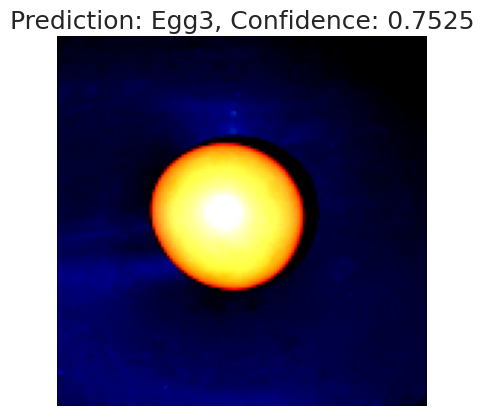

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# โหลดโมเดล ที่เราพัฒนาเสร็จแล้วมาใช้งาน
model_path = "/content/drive/MyDrive/egg_size_CNN/egg_model.pth"
model.load_state_dict(torch.load(model_path))
model.eval()

# เลือกรูปภาพที่ต้องการทดสอบ
test_image_path = "/content/drive/MyDrive/egg_size_CNN/train_test/train/LINE_ALBUM_เบอร์3_240701_99.jpg"

# อ่านรูปภาพและทำการปรับปรุงตามการแปลงที่ใช้ในการเทรน
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_image = Image.open(test_image_path)
test_image_tensor = transform(test_image)

# เพิ่ม batch dimension ด้วย unsqueeze
test_image_tensor = test_image_tensor.unsqueeze(0)

# ทำการทำนาย
with torch.no_grad():
    predictions = model(test_image_tensor)

# แปลงผลลัพธ์เป็นคลาสที่สูงที่สุด
predicted_class = torch.argmax(predictions).item()

# แปลงเลขคลาสเป็นชื่อสายพันธ์
class_names = ['Egg0', 'Egg1', 'Egg2', 'Egg3']
predicted_class_name = class_names[predicted_class]

# คำนวณค่า confidence
confidence = torch.nn.functional.softmax(predictions, dim=1)[0][predicted_class].item()

# แสดงรูปภาพพร้อม Label และ Confidence
plt.imshow(test_image_tensor.squeeze().permute(1, 2, 0))
plt.title(f"Prediction: {predicted_class_name}, Confidence: {confidence:.4f}")
plt.axis('off')
plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import torch
from torch.utils.data import DataLoader, Dataset

# กำหนดชื่อคลาส (ต้องตรงกับที่ใช้ในการฝึกโมเดล)
class_names = ['Egg0', 'Egg1', 'Egg2', 'Egg3']

# สร้าง custom dataset สำหรับรูปภาพในโฟลเดอร์
class CustomDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        self.image_paths = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path) if fname.endswith('.jpg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_path

# การแปลงที่ใช้ในการทำนาย
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# สร้าง Dataset และ DataLoader
custom_dataset = CustomDataset(test_folder_path, transform)
test_loader = DataLoader(custom_dataset, batch_size=1, shuffle=False)  # ใช้ batch_size=1 เพื่อแสดงรูปทีละรูป

# โหลดโมเดลที่ฝึกเสร็จแล้ว
model_path = "/content/drive/MyDrive/Egg 0-4 class /egg_model.pth"
model.load_state_dict(torch.load(model_path))
model.eval()

# แสดงรูปภาพจาก DataLoader พร้อมการทำนาย
for images, image_paths in test_loader:
    with torch.no_grad():
        predictions = model(images)
        predicted_classes = torch.argmax(predictions, 1)
        confidences = torch.nn.functional.softmax(predictions, dim=1)

    plt.figure(figsize=(5, 5))
    for i, (image, label, path) in enumerate(zip(images, predicted_classes, image_paths)):
        plt.imshow(image.numpy().transpose((1, 2, 0)), interpolation='nearest')
        class_name = class_names[label]
        image_name = os.path.basename(path)
        confidence = confidences[i][label].item()
        plt.title(f"Prediction: {class_name}\nActual: {image_name}\nConfidence: {confidence:.4f}",
                  color='blue', fontsize=10)
        plt.axis('off')
        plt.show()


NameError: name 'test_folder_path' is not defined